# Series

Series are one dimension, labeled arrays of any data type\
or, a sequence of values with associated labels

In [283]:
import pandas as pd

In [284]:
# Strings are converted into objects because NumPy expects all values to have the same size,
# so it converts them into objects with the same pointer size.
students = ['Andy', 'Simon', 'Joe', 'John'] # python list
pd.Series(students)

0     Andy
1    Simon
2      Joe
3     John
dtype: object

In [285]:
ages = [12, 32, 43, 52]
pd.Series(ages)

0    12
1    32
2    43
3    52
dtype: int64

In [286]:
heights = [1.71, 1.67, 1.83, 1.77]
heights_s = pd.Series(heights)
heights_s

0    1.71
1    1.67
2    1.83
3    1.77
dtype: float64

In [287]:
mixed = ['Andy', 32, {'phone':"222222"}]
pd.Series(mixed)

0                   Andy
1                     32
2    {'phone': '222222'}
dtype: object

In [288]:
dict_1 = {"Andy":32, "Joe":23, "John": 31}
pd.Series(dict_1)

Andy    32
Joe     23
John    31
dtype: int64

In [ ]:
# Name attribute - name of the Series.
heights_s.name = 'height (m)'
heights_s

0    1.71
1    1.67
2    1.83
3    1.77
Name: height (m), dtype: float64

In [290]:
pd.Series(dict(zip(students, ages)), name='students_ages')

Andy     12
Simon    32
Joe      43
John     52
Name: students_ages, dtype: int64

In [291]:
# head(n=5) tail(n=5)
int_series = pd.Series(range(60))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [292]:
int_series[0:10]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [293]:
int_series[5:10]

5    5
6    6
7    7
8    8
9    9
dtype: int64

In [294]:
int_series[-6:]

54    54
55    55
56    56
57    57
58    58
59    59
dtype: int64

### .loc

In [295]:
int_series.loc[30:38]

30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
dtype: int64

In [296]:
# Boolean Mask
int_series.loc[[True if i%2==0 else False for i in range(60)]]

0      0
2      2
4      4
6      6
8      8
10    10
12    12
14    14
16    16
18    18
20    20
22    22
24    24
26    26
28    28
30    30
32    32
34    34
36    36
38    38
40    40
42    42
44    44
46    46
48    48
50    50
52    52
54    54
56    56
58    58
dtype: int64

In [297]:
# Exercise
squares = pd.Series([i**2 for i in range(100)])
squares

0        0
1        1
2        4
3        9
4       16
      ... 
95    9025
96    9216
97    9409
98    9604
99    9801
Length: 100, dtype: int64

In [298]:
squares[-3:]

97    9409
98    9604
99    9801
dtype: int64

In [299]:
squares.tail(3)

97    9409
98    9604
99    9801
dtype: int64

In [300]:
squares[-3:].equals(squares.tail(3))

True

#### Atributes

In [301]:
squares.size

100

In [302]:
squares.shape

(100,)

In [303]:
len(squares)

100

In [304]:
# unique values
squares.is_unique

True

In [305]:
# number of unique values
squares.nunique()

100

In [306]:
squares.is_monotonic_increasing

True

In [307]:
# Count the number of non empty values
squares.count()

np.int64(100)

In [308]:
# testing count with NaN
import numpy as np
squares_nan = squares.copy()
squares_nan[1] = np.nan
squares_nan[49] = np.nan
squares_nan

0        0.0
1        NaN
2        4.0
3        9.0
4       16.0
       ...  
95    9025.0
96    9216.0
97    9409.0
98    9604.0
99    9801.0
Length: 100, dtype: float64

In [309]:
squares_nan.size

100

In [310]:
squares_nan.count()

np.int64(98)

In [311]:
# Filter the NaN occurrence
squares_nan[squares_nan.isnull()]

1    NaN
49   NaN
dtype: float64

In [312]:
# python list of index
list(squares_nan[squares_nan.isnull()].index)

[1, 49]

In [313]:
# count nan values
squares_nan.isna().sum()

np.int64(2)

In [314]:
squares_nan[np.isnan]

1    NaN
49   NaN
dtype: float64

In [ ]:
# get not null values
squares_nan[squares_nan.notna()]

0        0.0
2        4.0
3        9.0
4       16.0
5       25.0
       ...  
95    9025.0
96    9216.0
97    9409.0
98    9604.0
99    9801.0
Length: 98, dtype: float64

In [316]:
# sum of values less than 100
squares[squares < 100].sum()

np.int64(285)

In [317]:
squares[:11]

0       0
1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64

#### Dropping and Filling NaN

In [318]:
# squares_nan = squares_nan.dropna()
# squares_nan.dropna(inplace=True)
# squares_nan.fillna('new_value', inplace=True)
squares_nan.fillna(1,inplace=True)
squares_nan[49]

np.float64(1.0)

In [319]:
squares.mean()

np.float64(3283.5)

In [320]:
squares.median()

2450.5

In [321]:
# squares.var() -> variance
squares.std()

2968.1748039269296

In [322]:
IQR = squares.quantile(0.75) - squares.quantile(0.25)
IQR

np.float64(4900.5)

In [323]:
# min and max
squares.min()

0

In [324]:
squares.max()

9801

In [325]:
# describe()
squares.describe()

count     100.000000
mean     3283.500000
std      2968.174804
min         0.000000
25%       612.750000
50%      2450.500000
75%      5513.250000
max      9801.000000
dtype: float64

In [326]:
np.random.seed(42)
random_int = pd.Series(np.random.randint(0, 100, size=100))
random_int

0     51
1     92
2     14
3     71
4     60
      ..
95    84
96    79
97    81
98    52
99    23
Length: 100, dtype: int64

In [327]:
random_int.mode()

0    61
dtype: int64

In [328]:
random_int.value_counts()

61    5
59    4
1     4
20    3
52    3
     ..
94    1
47    1
39    1
84    1
81    1
Name: count, Length: 61, dtype: int64

In [329]:
random_int.value_counts().iloc[:7]

61    5
59    4
1     4
20    3
52    3
3     3
14    3
Name: count, dtype: int64

In [330]:
random_int.value_counts(normalize=True)

61    0.05
59    0.04
1     0.04
20    0.03
52    0.03
      ... 
94    0.01
47    0.01
39    0.01
84    0.01
81    0.01
Name: proportion, Length: 61, dtype: float64

In [331]:
random_int.max()

99

In [332]:
random_int.sort_values(ascending=False, inplace=True)

In [333]:
random_int.idxmax()

np.int64(11)

In [334]:
random_int[random_int == random_int.max()]

11    99
85    99
dtype: int64

In [335]:
random_int[random_int == random_int.min()]

20    1
16    1
58    1
72    1
dtype: int64

In [336]:
# nlargest / nsmallest
random_int.nlargest(10)

11    99
85    99
87    94
1     92
77    92
60    91
33    91
30    90
56    89
80    89
dtype: int64

In [337]:
random_int

11    99
85    99
87    94
1     92
77    92
      ..
44     2
20     1
16     1
58     1
72     1
Length: 100, dtype: int64

In [338]:
# original ordering by index
random_int.sort_index(inplace=True)
random_int

0     51
1     92
2     14
3     71
4     60
      ..
95    84
96    79
97    81
98    52
99    23
Length: 100, dtype: int64

In [339]:
largest = random_int.nlargest(50)
largest

11    99
85    99
87    94
1     92
77    92
33    91
60    91
30    90
56    89
80    89
28    88
52    88
10    87
17    87
7     86
92    86
95    84
59    83
6     82
97    81
68    80
35    79
96    79
67    77
91    77
25    75
8     74
9     74
83    73
48    72
3     71
90    71
62    70
21    63
43    63
78    62
37    61
38    61
40    61
84    61
93    61
4     60
22    59
34    59
53    59
61    59
31    58
26    57
42    54
74    53
dtype: int64

In [340]:
largest.describe()

count    50.00000
mean     75.22000
std      13.30688
min      53.00000
25%      61.00000
50%      76.00000
75%      87.00000
max      99.00000
dtype: float64

In [341]:
smallest = random_int.nsmallest(20)
smallest

16     1
20     1
58     1
72     1
13     2
44     2
51     3
71     3
75     3
73     5
46     6
64     7
55     8
54    13
86    13
2     14
36    14
89    14
50    17
79    17
dtype: int64

In [342]:
smallest.describe()

count    20.000000
mean      7.250000
std       5.919415
min       1.000000
25%       2.000000
50%       5.500000
75%      13.250000
max      17.000000
dtype: float64

In [343]:
random_int.describe()

count    100.000000
mean      50.540000
std       29.425963
min        1.000000
25%       22.500000
50%       53.000000
75%       75.500000
max       99.000000
dtype: float64

In [344]:
# adding 2 series -> fill_value (avoid NaN values)
new_values = pd.Series({0:1, 1: 2})
squares.add(new_values, fill_value=0)

0        1.0
1        3.0
2        4.0
3        9.0
4       16.0
       ...  
95    9025.0
96    9216.0
97    9409.0
98    9604.0
99    9801.0
Length: 100, dtype: float64

In [345]:
# Other operations

#squares.subtract(new_values, fill_value=0)
#squares.divide(new_values, fill_value=1)
#squares.multiply(new_values, fill_value=1)

In [346]:
# Sample variance
random_int.var()


865.8872727272732

In [347]:
# Population variance (N-ddof) default=1
random_int.var(ddof=0)

857.2284000000004

In [348]:
random_int

0     51
1     92
2     14
3     71
4     60
      ..
95    84
96    79
97    81
98    52
99    23
Length: 100, dtype: int64

In [349]:
# element-wise difference vi-vi-1
random_int.diff(periods=1)

0      NaN
1     41.0
2    -78.0
3     57.0
4    -11.0
      ... 
95    45.0
96    -5.0
97     2.0
98   -29.0
99   -29.0
Length: 100, dtype: float64

In [350]:
# itarations
mini_random_int = random_int[:10]
mini_random_int

0    51
1    92
2    14
3    71
4    60
5    20
6    82
7    86
8    74
9    74
dtype: int64

In [351]:
for i in mini_random_int:
    print(i)

51
92
14
71
60
20
82
86
74
74


In [352]:
for i in mini_random_int.index:
    print(i)

0
1
2
3
4
5
6
7
8
9


In [353]:
# items() return a tuple
for i in mini_random_int.items():
    print(i)

(0, 51)
(1, 92)
(2, 14)
(3, 71)
(4, 60)
(5, 20)
(6, 82)
(7, 86)
(8, 74)
(9, 74)


In [354]:
# apply()
def multiply_by_3(x):
    return 3 * x

random_int.apply(multiply_by_3)

0     153
1     276
2      42
3     213
4     180
     ... 
95    252
96    237
97    243
98    156
99     69
Length: 100, dtype: int64

In [355]:
def multiply_small_by_3(x, min):
    if x > min: return x

    return x * 3

random_int.apply(multiply_small_by_3, args=(50,))

0     51
1     92
2     42
3     71
4     60
      ..
95    84
96    79
97    81
98    52
99    69
Length: 100, dtype: int64

In [356]:
random_int.apply(multiply_small_by_3, min=50)

0     51
1     92
2     42
3     71
4     60
      ..
95    84
96    79
97    81
98    52
99    69
Length: 100, dtype: int64

In [357]:
# Exercise
np.random.seed(42)
random_int_200 = pd.Series(np.random.randint(0,100,200))
random_int_100 = pd.Series(np.random.randint(0,100,100))

In [358]:
# left skewed distribution
np.random.seed(42)
random_int_left = pd.Series(np.random.randint(0,50,100))
random_int_left.head()


0    38
1    28
2    14
3    42
4     7
dtype: int64

In [359]:
new_serie_l = pd.concat([random_int_100, random_int_left], ignore_index=True)
new_serie_l

0       8
1      61
2      36
3      96
4      50
       ..
195    14
196    44
197     0
198    24
199     6
Length: 200, dtype: int64

In [360]:
# right skewed distribution
np.random.seed(42)
random_int_right = pd.Series(np.random.randint(50,100,100))
random_int_right.head()

0    88
1    78
2    64
3    92
4    57
dtype: int64

In [361]:
new_serie_r = pd.concat([random_int_100, random_int_right], ignore_index=True)
new_serie_r

0       8
1      61
2      36
3      96
4      50
       ..
195    64
196    94
197    50
198    74
199    56
Length: 200, dtype: int64

In [362]:
pd.concat([random_int_200.describe(), new_serie_l.describe(), new_serie_r.describe()], axis=1)

,0,1,2
count,200.000000,200.000000,200.000000
mean,49.010000,36.365000,61.365000
std,29.667502,27.090427,27.279896
min,0.000000,0.000000,0.000000
25%,24.500000,15.000000,50.750000
50%,50.500000,31.500000,66.000000
75%,74.250000,51.000000,85.000000
max,99.000000,98.000000,99.000000


In [363]:
print(random_int_200.mode()[0], new_serie_l.mode()[0], new_serie_r.mode()[0])

61 1 51


In [364]:
random_int_200.value_counts().iloc[:10]

61    10
14     6
59     5
88     5
87     5
2      4
1      4
89     4
27     4
34     4
Name: count, dtype: int64

In [365]:
new_serie_l.value_counts().iloc[:10]

1     9
43    7
23    6
38    5
18    5
58    4
31    4
20    4
8     4
6     4
Name: count, dtype: int64

In [366]:
new_serie_r.value_counts().iloc[:10]

96    7
51    7
89    6
93    6
58    6
74    5
1     5
70    5
78    4
31    4
Name: count, dtype: int64

In [367]:
# z-scores
def z_score(x, mean, std):
    return (x-mean)/std

s1 = random_int_200.apply(z_score, mean=random_int_200.mean(), std=random_int_200.std())
s2 = new_serie_l.apply(z_score, mean=new_serie_l.mean(), std=new_serie_l.std())
s3 = new_serie_r.apply(z_score, mean=new_serie_r.mean(), std=new_serie_r.std())

pd.concat([s1, s2, s3], axis=1)

,0,1,2
0,0.067077,-1.047049,-1.956202
1,1.449060,0.909362,-0.013380
2,-1.180079,-0.013473,-0.929806
3,0.741215,2.201331,1.269616
4,0.370439,0.503314,-0.416607
...,...,...,...
195,0.909750,-0.825568,0.096591
196,-1.584562,0.281834,1.196302
197,0.673801,-1.342356,-0.416607
198,0.741215,-0.456434,0.463162


In [368]:
s1.nlargest(5)

11     1.685009
85     1.685009
136    1.651302
142    1.651302
191    1.583888
dtype: float64

In [369]:
s1.nsmallest(5)

112   -1.651976
146   -1.651976
192   -1.651976
16    -1.618269
20    -1.618269
dtype: float64

In [370]:
s2.nlargest(5)

84    2.275158
97    2.275158
47    2.238245
3     2.201331
29    2.201331
dtype: float64

In [371]:
s2.nsmallest(5)

30    -1.342356
74    -1.342356
90    -1.342356
197   -1.342356
18    -1.305443
dtype: float64

In [372]:
s3.nlargest(5)

147    1.379587
162    1.379587
84     1.342930
97     1.342930
129    1.342930
dtype: float64

In [373]:
s3.nsmallest(5)

30   -2.249459
74   -2.249459
90   -2.249459
18   -2.212802
23   -2.212802
dtype: float64

<Axes: ylabel='Density'>

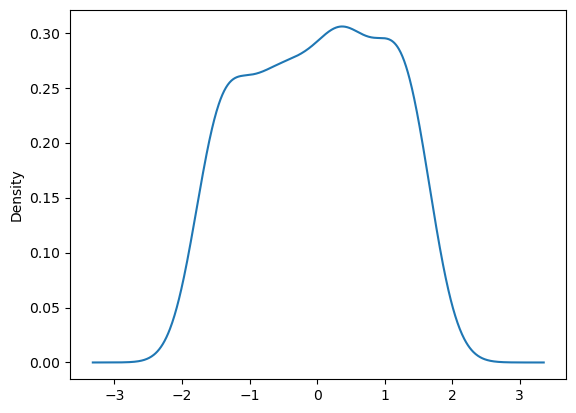

In [374]:
s1.plot.kde()

<Axes: ylabel='Density'>

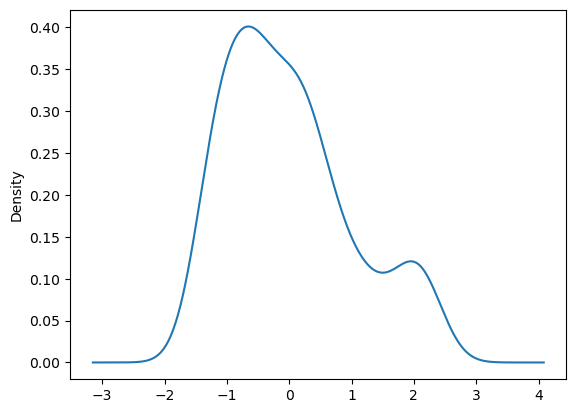

In [375]:
s2.plot.kde()

<Axes: ylabel='Density'>

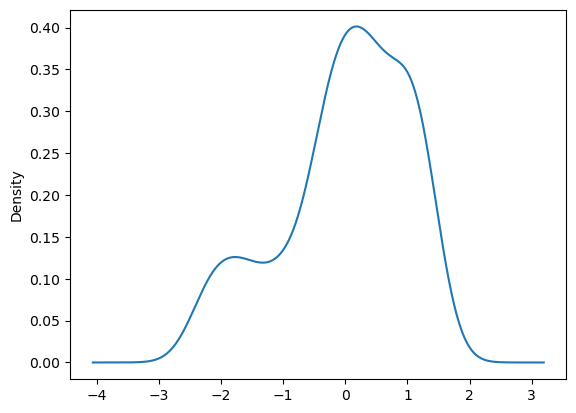

In [376]:
s3.plot.kde()